<a href="https://colab.research.google.com/github/pablogarciasanchez/Automatic_Detection_of_Pneumonia_using_Deep_Learning/blob/main/OnlineNewsPopularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Automático - Proyecto Final - Predicción de Popularidad de una Noticia Online

# Autores

- Pablo García Sánchez
- José Antonio López Palenzuela

# Nota

Se recomienda leer la memoria. Aunque el contenido es el mismo, en este cuaderno los comentarios se intercalan con celdas de código que pueden dificultar la compresión del mismo.

# 1.Introducción

En un mundo donde las redes sociales y los medios digitales ya son una de las principales fuentes de información de cualquier ciudadano, predecir el alcance o popularidad de una noticia online se ha convertido en una necesidad primaria para cualquiera cuyo sustento esté a merced de la opinión pública. Desde articulistas a políticos, pasando por publicistas y activistas.

La popularidad de una publicación online puede cuantificarse a través del número de veces que se interacciona con ella: “retweets”, comentarios, veces compartida … Luego predecir la popularidad de un artículo podría entenderse como predecir el número de interacciones que tendrá, un problema de regresión.

Sin embargo, el enfoque de este proyecto fue distinto, se resolvió como un problema de clasificación binaria (popular/impopular). Para ello, se estableció de antemano un umbral que divide el espacio de artículos en dos conjuntos: populares, artículos cuyo número de interacciones es menor que el umbral; e impopulares, artículos cuyo número de interacciones se encuentra por encima del umbral.

En este estudio se implementaron y compararon las prestaciones de los siguientes modelos de clasificación: regresión logística (RL y Random Forest (RF). El objetivo es determinar qué técnica permite determinar mejor si un artículo cualquiera será un éxito antes de publicarlo.

Mencionar que este proyecto está bastante inspirado en el artículo original en el que se planteó este mismo problema [1]. Especialmente la forma en la que se transforma el problema de una aparente regresión a una clasificación binaria. En [1] se combina una primera parte de implementación  de modelos predictivos (Random Forest, Adaptive, SVM-RBF, KNN y Naïve Bayes), con una segunda parte de refinamiento o optimización del mejor modelo encontrado (RF). Por contra, en este proyecto se implementaron un clasificador lineal (Regresión Logística) y 1 clasificadores no-lineales (Random Forest) utilizando un estrategia de entrenamiento y evaluación distintas al artículo original (no se utiliza el esquema de ventana deslizante) a fin de encontrar el mejor modelo para la tarea de clasificación en cuestión.


# 2.Conjunto de Datos

### 2.1 Descripción

El conjunto de datos disponible está compuesto por información relativa a los 39.797 artículos que el medio Marshable publicó en su web [2] entre el 7 de Enero de 2013 y el 7 de Enero de 2015 (un periodo de 2 años).


Los atributos asociados a cada artículo pueden clasificarse en las siguientes categorías:

- Metadatos: No se utilizan para labores predictivas.

n | Nombre | Descripción | Tipo |
-|-|-|-|
1 | url | Dirección URL del artículo | String
2 | tiemdelta | Tiempo desde la publicación del artículo a la adquisición de datos (7 de Enero de 2015) | Numérico

- Palabras: Relacionados con el número y frecuencia de distintos tipos de palabras.

n | Nombre | Descripción | Tipo |
-|-|-|-|
3 | n_tokens_title | Número de palabras del título | Numérico
4 | n_tokens_content | Número de palabras del artículo | Numérico
5 | average_token_length | Longitud media por palabra | Numérico
6 | n_non_stop_words | Ratio de palabras no-compuestas | Numérico
7 | n_unique_tokens | Ratio de palabras únicas | Numérico
8 | n_non_stop_unique_tokens | Ratio de palabras únicas no-compuestas | Numérico

- Enlaces externos: Relacionados con los enlaces a otras páginas web y artículos de Marshable.

n | Nombre | Descripción | Tipo |
-|-|-|-|
9 | num_hrefs | Número total de enlaces | Numérico
10 | num_self_hrefs | Número de enlaces a otros artículos de Marshable | Numérico
11 | self_reference_min_shares | Número de veces compartido (mínimo) de los artículos Marshable enlazados | Numérico
12 | self_reference_avg_shares | Número de veces compartido (máximo) de los artículos Marshable enlazados  | Numérico
13 | self_reference_max_shares | Número de veces compartido (medio) de los artículos Marshable enlazados  | Numérico

- Contenido multimedia: Número de fotos y vídeos.

n | Nombre | Descripción | Tipo |
-|-|-|-|
14 | num_imgs | Número de imágenes | Numérico
15 | num_videos | Número de vídeos | Numérico

- Fecha de Publicación: Relacionado con el día de la semana en el que se publicó.

n | Nombre | Descripción | Tipo |
-|-|-|-|
16 | weekday_is_monday | ¿Lunes? | Binaria
17 | weekday_is_tuesday | Martes? | Binaria
18 | weekday_is_wednesday | Miércoles? | Binaria
19 | weekday_is_thursday | ¿Jueves? | Binaria
20 | weekday_is_friday | ¿Viernes? | Binaria
21 | weekday_is_saturday | ¿Sábado? | Binaria
22 | weekday_is_sunday | ¿Domingo? | Binaria
23 | is_weekend | ¿Fin de semana? | Binaria

- Palabras Clave: Las palabras clave de un artículo se encuentran definidas de antemano. Todo artículo tiene una mejor, peor y media palabra clave, ordenadas en función del número total de veces que hayan sido compartidos los artículos en los que aparecen. De cada palabra clave, a su vez,  se conoce el número mínimo, máximo y medio de veces compartidos de los artículos en los que aparece. También se incluye la categoría formal de Marshable a la que pertenece el artículo.

n | Nombre | Descripción | Tipo |
-|-|-|-|
24 | num_keywords | Número de palabras clave | Numérica
25 | kw_min_min | Número de veces compartido (mínimo) de la peor palabra clave | Numérica
26 | kw_avg_min | Número de veces compartido (medio) de la peor palabra clave | Numérica
27 | kw_max_min | Número de veces compartido (máximo) de la peor palabra clave | Numérica
28 | kw_min_max | Número de veces compartido (mínimo) de la mejor palabra clave | Numérica
29 | kw_avg_max | Número de veces compartido (medio) de la mejor palabra clave | Numérica
30 | kw_max_max | Número de veces compartido (máximo) de la mejor palabra clave | Numérica
31 | kw_min_avg | Número de veces compartido (mínimo) de la mejor palabra media | Numérica
32 | kw_avg_avg | Número de veces compartido (medio) de la mejor palabra media | Numérica
33 | kw_max_avg | Número de veces compartido (máximo) de la mejor palabra media | Numérica
34 | data_channel_is_lifestyle | ¿Categoría del artículo = lifesyle? | Binaria
35 | data_channel_is_entertainment | ¿Categoría del artículo = entertainment? | Binaria
36 | data_channel_is_bus | ¿Categoría del artículo = bus? | Binaria
37 | data_channel_is_socmed | ¿Categoría del artículo = socmed? | Binaria
38 | data_channel_is_tech| ¿Categoría del artículo = tech? | Binaria
39 | data_channel_is_world | ¿Categoría del artículo = world? | Binaria

- Procesado de Lenguaje Natural: Adquiridos a través de técnicas de procesado de lenguaje natural como LDA [3] o análisis de sentimientos [4]. El algoritmo LDA permite identificar los 5 temas centrales del conjunto de artículos conocido y la cercanía ([0,1]) de cada artículo a estos. El análisis de sentimientos permite computar distintas medidas relacionadas con el grado de polarización y subjetividad del contenido de un artículo.

n | Nombre | Descripción | Tipo |
-|-|-|-|
40 | LDA_00 | Cercanía al tema LDA_0 | Binaria
41 | LDA_01 | Cercanía al tema LDA_1 | Binaria
42 | LDA_02 | Cercanía al tema LDA_2 | Binaria
43 | LDA_03 | Cercanía al tema LDA_3 | Binaria
44 | LDA_04 | Cercanía al tema LDA_4 | Binaria
45 | title_subjectivity | Subjetividad del título | Numérica
46 | abs_title_subjectivity | Subjetividad absoluta del título | Numérica
47 | title_polarity | Polaridad del título | Numérica
48 | abs_title_polarity | Subjetividad absoluta del título | Numérica
49 | global_rate_positive_words | Ratio total de palabras positivas | Numérica
50 | global_rate_negative_words | Ratio total de palabras negativas | Numérica
51 | rate_positive_words | Ratio de palabras positivas respecto a neutrales | Numérica
52 | rate_negative_words | Ratio de palabras negativas respecto a neutrales | Numérica
53 | min_negative_polarity | Polaridad mínima de palabras negativas | Numérica
54 | avg_negative_polarity | Polaridad media de palabras negativas | Numérica
55 | max_negative_polarity | Polaridad máxima de palabras negativas | Numérica
56 | min_positive_polarity | Polaridad mínima de palabras positivas | Numérica
57 | avg_positive_polarity | Polaridad media de palabras positivas | Numérica
58 | max_positive_polarity | Polaridad máxima de palabras positivas | Numérica
59 | global_subjectivity | Subjetividad del artículo completo | Numérica
60 | global_sentiment_polarity | Polaridad del artículo completo | Numérica

- Etiqueta: Número de veces compartido o interacciones.

n | Nombre | Descripción | Tipo |
-|-|-|-|
61 | shares | Número de veces compartido | Numérico

In [ ]:
from google.colab import drive
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Lectura de datos problema: Popularidad de una noticia online
# Carga desde fichero
drive.mount('/content/drive')
data_filepath = '/content/drive/MyDrive/Tercero_Segundo_Cuatrimestre/AA/PF/OnlineNewsPopularity/OnlineNewsPopularity.csv'
df_read_data = pd.read_csv (data_filepath, header=0, delimiter=', ')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


### Transformación de Etiquetas

Como ya se ha mencionado, predecir la popularidad de un artículo se enfrentó como un problema de clasificación binaria: popular e impopular. Obviamente debe aplicarse algún tipo de transformación a la etiqueta de cada artículo, que es un entero que representa el número de veces que se ha compartido un artículo (interacciones). La solución fue sencilla, fijar un umbral para el número de iteraciones de un artículo que divide el espacio en impopulares (etiqueta < umbraletiquetado) y populares (etiqueta >= umbraletiquetado). Esta forma de transformar un problema de regresión a clasificación provoca que los resultados de este estudio sean poco relevantes en un contexto real, al fin y al cabo este umbral se ha fijado de forma arbitraria y el modelo que mejor clasifique en relación a éste no tiene por qué ser el mejor modelo para cualquier otro. Este podría ser un aspecto a mejorar en el futuro. La transformación se aplicó en el pre-procesamiento de datos, tras dividir el conjunto de datos en entrenamiento y test, ya que se utilizó la mediana del conjunto de entrenamiento como umbral (al igual que en [1]).


### Sesgo en la toma de datos

Al igual que en [1], se descartaron los artículos más recientes, aquellos publicados hace menos de 3 semanas de la fecha en la que se adquirieron los datos, ya que el número de veces que se comparte un artículo no suele estabilizarse (alcanzar su valor real) hasta pasado un tiempo. Se estaría introduciendo un sesgo (los artículos publicados días antes del 7 de Enero de 2015 son menos populares que el resto) que se sabe a priori que no es cierto. Esta decisión derivó en la eliminación de un total de 562 artículos, un 1.00% del total, una pérdida asumible.


In [ ]:
# Eliminar los artículos cuyo número de interacciones no ha alcanzado su máximo
num_orig_art = len(df_read_data)
df_read_data = df_read_data.drop(df_read_data[df_read_data['timedelta'] < 21].index)

In [ ]:
print("Número original de artículos: {}".format(num_orig_art))
print("Artículos eliminados: {} - {}% del total".format(num_orig_art-len(df_read_data), np.round((num_orig_art-len(df_read_data))*100.0/num_orig_art), 4))
print("Número final de artículos: {}".format(len(df_read_data)))

Número original de artículos: 39644
Artículos eliminados: 562 - 1.0% del total
Número final de artículos: 39082


Recapitulando, del total de artículos (39644) se utilizan 39082. Cada artículo tiene en total 61 variables asociadas (incluída la etiqueta). A partir de estos datos se debe implementar y evaluar un clasificador que prediga si un artículo será popular.


# 3.Metodología

A través de la biblioteca ScikitLearn [6] se implementaron cada uno de los clasificadores propuestos: Regresión Logística (RL) y Random Forest (RF). Antes de implementar cada uno de ellos, se reservó parte del conjunto de datos (Partición Entrenamiento-Test, subsección 3.1). Salvo que se especifique lo contrario, todos comparten las mismas técnicas de preprocesamiento (Preprocesamiento, subsección 3.2). Todos utilizan las mismas métricas de error para evaluar sus prestaciones (Métricas de Error, subsección 3.3). En esta sección se describen en detalle estos aspectos comunes.

En la sección dedicada a la implementación y entrenamiento de cada modelo (secciones 4 y 5), se discutirá la idoneidad del algoritmo de aprendizaje, la función pérdida, el tipo de regularización, el valor de sus hiperparámetros ...

Finalmente, en la sección de Conclusiones (sección 6) se seleccionará el modelo con mejores prestaciones (validación cruzada sobre el conjunto de entrenamiento) y se estimará su rendimiento para un caso cualquiera (utilizando el conjunto de test previamente reservado).

## 3.1 Partición Entrenamiento-Test

Para evitar el “data snooping” y poder ofrecer una estimación lo más realista posible de la generalidad del modelo finalmente propuesto, el primer paso antes de visualizar, preprocesar o entrenar con los datos fue dividir de forma aleatoria el total de datos disponibles en dos conjuntos: entrenamiento (80%) y test (20%).

Recuérdese que el objetivo del proyecto es construir un modelo capaz de predecir la popularidad de un artículo cualquiera. Se trata de una demostración imposible (infinitos artículos posibles) por lo que es necesario encontrar una estimación alternativa de esta generalidad que permita evaluar el modelo finalmente propuesto. Dicho modelo opera en base a una serie de hipótesis o sesgos que aprende de las características y patrones subyacentes al sub-espacio de casos conocidos (conjunto de entrenamiento). Sin garantía alguna de que este subespacio sea una muestra representativa del espacio completo, el rendimiento del modelo para este subespacio es una estimación demasiado sesgada, demasiado optimista, de la validez de lo aprendido para cualquier caso ("data snooping"). Es por esto que se reserva parte de los casos disponibles (el conjunto de test), para estimar la generalidad del modelo finalmente propuesto de forma menos sesgada, más pesimista. Cómo de representativa es esta estimación puede aproximarse a través de la desigualdad de Hoeffding, el tamaño del conjunto de test y una métrica de error cualquiera para dicho conjunto (|Etest|):

<center>

$P( |E_{test}−E_{out} < ϵ )  ≤  2 ⋅ e^{−2⋅ϵ·2⋅|E_{test}|}$

</center>

En conclusión, debe reservarse una parte del conjunto de casos disponible (el conjunto de test) que no afecte al funcionamiento del modelo durante ninguna etapa de la implementación (preprocesado, estimación de hiperparámetros, entrenamiento …) para estimar el rendimiento de dicho modelo fuera del subespacio de casos conocido (el conjunto de entrenamiento) de una forma realista. La generalidad del modelo debe evaluarse ante datos que no sesguen su funcionamiento.

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Partición aleatoria (semilla=1), 80-20, manteniendo proporción de las etiquetas.
X_train, X_test, y_train, y_test = train_test_split(
                                        df_read_data.drop(columns = ['shares']),
                                        df_read_data['shares'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
)


## 3.2 Visualización de Datos y Pre-Procesamiento

Salvo que se especifique lo contrario, se aplicaron las mismas técnicas de preprocesamiento en todos los modelos. Estas técnicas se aplican al conjunto de test y entrenamiento previa utilización en los modelos; sin embargo, las decisiones únicamente deben estar motivadas por el conjunto de entrenamiento (evitar “data snooping”).

### 3.2.1 Eliminación de atributos irrelevantes

Como se exige en [1], se eliminaron los atributos “timedelta” (días entre la publicación del artículo y la obtención de los datos) y “url” (dirección URL del artículo) ya que son atributos que no influyen en el proceso predictivo.

In [ ]:
# Eliminar los atributos no-predictivos
X_train = X_train.drop(columns=['timedelta','url'])

### 3.2.2 Imputación de Valores Ausentes

No existen valores ausentes en el conjunto de entrenamiento ni en el conjunto de test (leve espionaje de datos). Sin embargo, esto no implica que en la práctica el modelo no tenga que enfrentarse a ellos. Si en un futuro se necesita una técnica para la imputación de datos perdidos, se recurriría al criterio descrito en el guión del proyecto.

### 3.2.3 Varibales Categóricas

Como ya se ha mencionado se encuentran codificadas (de la forma one-hot-encoding) de antemano (consultar [5]).

In [ ]:
# Identificación de variables que están binarizadas (proceden de la codificaicón de categñoricas)
binary_cols = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus',
               'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world',
               'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday',
               'weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']
for c in binary_cols:
 print('Valores posibles de la varibale {}: {}'.format(c, X_train[c].unique() ))

Valores posibles de la varibale data_channel_is_lifestyle: [0. 1.]
Valores posibles de la varibale data_channel_is_entertainment: [0. 1.]
Valores posibles de la varibale data_channel_is_bus: [0. 1.]
Valores posibles de la varibale data_channel_is_socmed: [0. 1.]
Valores posibles de la varibale data_channel_is_tech: [1. 0.]
Valores posibles de la varibale data_channel_is_world: [0. 1.]
Valores posibles de la varibale weekday_is_monday: [0. 1.]
Valores posibles de la varibale weekday_is_tuesday: [1. 0.]
Valores posibles de la varibale weekday_is_wednesday: [0. 1.]
Valores posibles de la varibale weekday_is_thursday: [0. 1.]
Valores posibles de la varibale weekday_is_friday: [0. 1.]
Valores posibles de la varibale weekday_is_saturday: [0. 1.]
Valores posibles de la varibale weekday_is_sunday: [0. 1.]
Valores posibles de la varibale is_weekend: [0. 1.]


### 3.2.4 Varibales Numéricas

A continuación se muestra una tabla con información relativa de cada varibale numérica: media, desviación típica, valores mínimos y máximos y percentiles.

In [ ]:
# Identificación de variables numéricas
numeric_cols = np.setdiff1d(X_train.columns, binary_cols)
# Tabla: Media, desviación típica, valores mínimos, máximos y percentiles de las varibales numéricas.
X_train[numeric_cols].describe()

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,abs_title_sentiment_polarity,abs_title_subjectivity,average_token_length,avg_negative_polarity,avg_positive_polarity,...,num_keywords,num_self_hrefs,num_videos,rate_negative_words,rate_positive_words,self_reference_avg_sharess,self_reference_max_shares,self_reference_min_shares,title_sentiment_polarity,title_subjectivity
count,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000,...,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000
mean,0.183949,0.141088,0.214871,0.224043,0.236017,0.155572,0.342195,4.556425,-0.259751,0.354920,...,7.234671,3.311626,1.270270,0.288011,0.683779,6491.992524,10498.844752,4064.525965,0.071247,0.281508
std,0.262239,0.219470,0.281239,0.295671,0.290618,0.225953,0.188433,0.822547,0.127067,0.103720,...,1.905398,3.878145,4.138338,0.155690,0.188161,25008.072748,42178.200253,20637.930728,0.264919,0.323845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.025048,0.025010,0.028571,0.026278,0.028574,0.000000,0.166667,4.479876,-0.327929,0.306782,...,6.000000,1.000000,0.000000,0.185714,0.600000,983.000000,1100.000000,640.000000,0.000000,0.000000
50%,0.033382,0.033345,0.040003,0.040001,0.040965,0.000000,0.500000,4.664122,-0.253582,0.359185,...,7.000000,3.000000,0.000000,0.280000,0.711111,2200.000000,2900.000000,1200.000000,0.000000,0.133333
75%,0.240929,0.150902,0.327994,0.376993,0.405311,0.250000,0.500000,4.855670,-0.187500,0.411979,...,9.000000,4.000000,1.000000,0.384615,0.800000,5175.000000,7900.000000,2600.000000,0.142424,0.500000
max,0.920000,0.925947,0.919999,0.926534,0.927191,1.000000,0.500000,8.041534,0.000000,1.000000,...,10.000000,116.000000,91.000000,1.000000,1.000000,843300.000000,843300.000000,843300.000000,1.000000,1.000000


Se observó que los valores de estos atributos para los artículos del conjunto de entrenamiento se encuentran distribuidos en escalas dramáticamente distintas. Esta diferencia de escala puede afectar negativamente al funcionamiento de alguno de los modelos implementados (RL) [7]. Para solventar esta problemática se estandarizaron los valores de cada uno de estos atributos numéricos. Estandarizar es una técnica de re-escalado que consiste en restar la media y dividir entre la varianza del atributo a cada valor de este. Ejemplo de estandarización para el número de palabras total del artículo (n_tokens_content) y el máximo de veces que se comparte la palabra clave más compartida de un artículo (kw_max_max).

In [ ]:
# Instacnciación del escalor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)

In [ ]:
transformed = scaler.fit_transform(X_train[['n_tokens_content', 'kw_max_max']])

In [ ]:
transformed = pd.DataFrame(transformed, columns = scaler.get_feature_names_out(['n_tokens_content' , 'kw_max_max']))

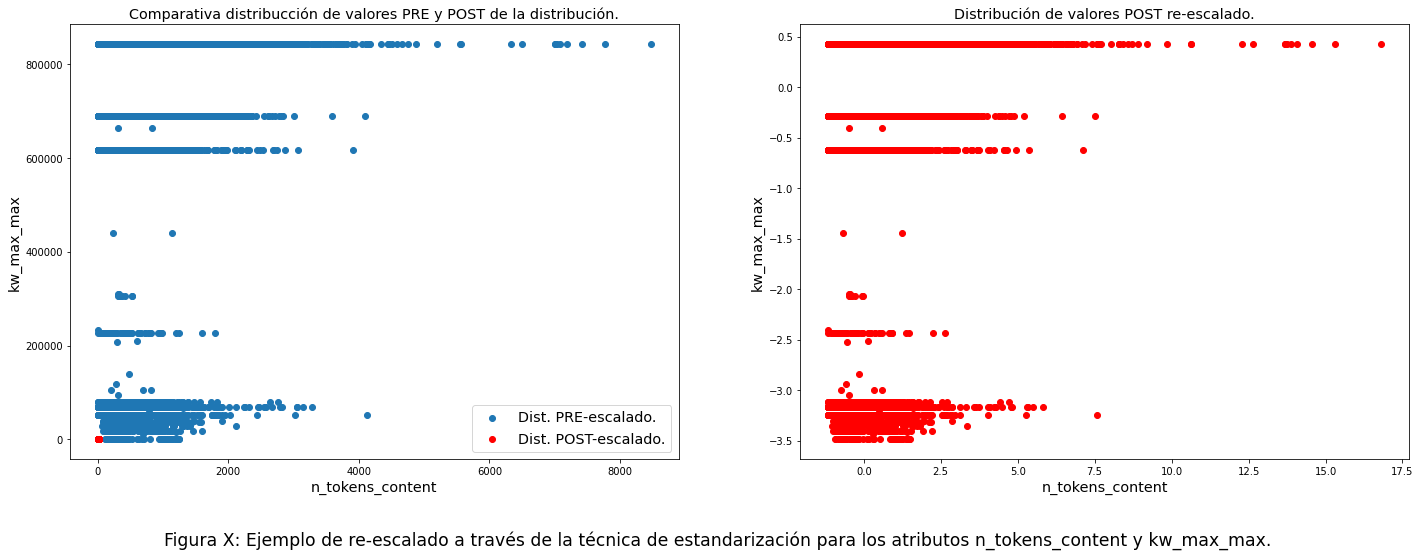

In [ ]:
# Figura
fig, axes = plt.subplots(1,2)
fig.set_facecolor("w")
fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*4)

axes[0].scatter(X_train[['n_tokens_content']], X_train[['kw_max_max']], label='Dist. PRE-escalado.')
axes[0].scatter(transformed[['n_tokens_content']], transformed[['kw_max_max']], color='r', label='Dist. POST-escalado.')
axes[0].set_title('Comparativa distribucción de valores PRE y POST de la distribución.', fontsize='x-large')
axes[0].set_xlabel('n_tokens_content', fontsize='x-large')
axes[0].set_ylabel('kw_max_max', fontsize='x-large')

axes[1].scatter(transformed[['n_tokens_content']], transformed[['kw_max_max']], color='r', label='Dist. POST-escalado.')
axes[1].set_title('Distribución de valores POST re-escalado.', fontsize='x-large')
axes[1].set_xlabel('n_tokens_content', fontsize='x-large')
axes[1].set_ylabel('kw_max_max', fontsize='x-large')


# Título
#fig.suptitle('Figura 1: Ejemplo de estandarización. Una escala mucho más comparable.', fontsize = "xx-large", y=0)
fig.suptitle('Figura X: Ejemplo de re-escalado a través de la técnica de estandarización para los atributos n_tokens_content y kw_max_max.', fontsize = "xx-large", y=0)
axes[0].legend(fontsize='x-large')
plt.show()

Como puede observarse, se trata de una transformación lineal que mantiene las distancias entre valores (la forma de la distribución) re-escalando sus valores a una escala más manejable para el algoritmo de aprendizaje de ciertos modelos como la RL.

In [ ]:
transformed.describe()

,n_tokens_content,kw_max_max
count,3.126500e+04,3.126500e+04
mean,8.226978e-17,-1.706757e-16
std,1.000016e+00,1.000016e+00
min,-1.158931e+00,-3.484515e+00
25%,-6.349477e-01,4.277493e-01
50%,-2.912829e-01,4.277493e-01
75%,3.536190e-01,4.277493e-01
max,1.681771e+01,4.277493e-01


Antes del re-escalado n_token_content ∈ [0, 8000] y kw_max_max∈ [0, 800000] (hasta 2 órdenes de magnitud de diferencia). Después del re-escalado n_tokens_content ∈ [-1.16, 1.68] y kw_max_max∈ [-3.52, 0.42]. Matizar que esta técnica no es robusta frente a valores anómalamente altos, podría discutirse la adecuación de un técnica de re-escalado de este tipo.

### 3.2.5 Etiquetas

Al igual que en [1], el umbral seleccionado para re-etiquetar los datos fue la mediana de las etiquetas del  conjunto de entrenamiento 1400 interacciones (iteraciones). Convenientemente, este umbral genera una distribución balanceada de las etiquetas para el conjunto de entrenamiento: 56.16% de artículos que son populares y 46.84% que no lo son.

In [ ]:
# Tranformación de etiquetas
umbral = df_read_data['shares'].median()
df_read_data['shares'][df_read_data['shares'] < umbral] = -1 # Artículos impopulares
df_read_data['shares'][df_read_data['shares'] >= umbral ] = 1 # Artículos populares
df_read_data.rename(columns={'shares':'popularidad'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Tranformación de etiquetas
umbral = y_train.median()
y_train[y_train < umbral] = -1 # Artículos impopulares
y_train[y_train >= umbral ] = 1 # Artículos populares

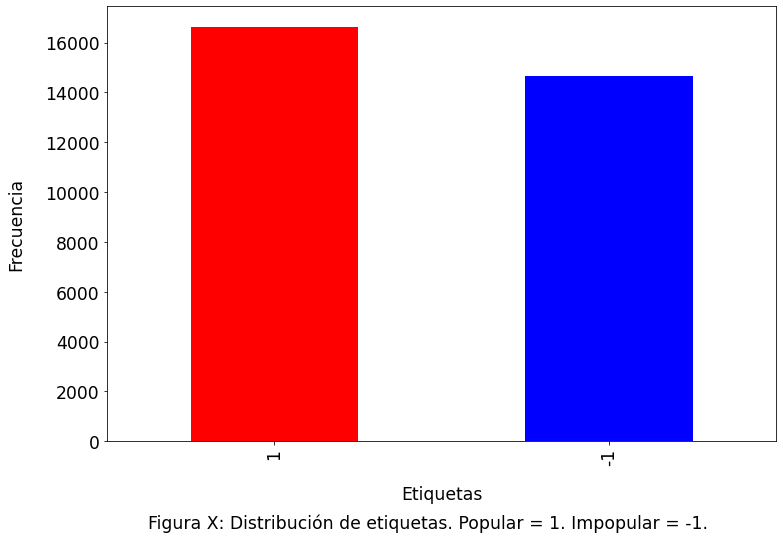

In [ ]:
# DDistribución gráfica de la figura
fig, axe = plt.subplots(1,1)
fig.set_facecolor("w")
fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*2)
fig.suptitle('Figura X: Distribución de etiquetas. Popular = 1. Impopular = -1. ', fontsize = "xx-large", y=0)
axe.tick_params(labelsize = "xx-large")
axe.set_xlabel("Etiquetas", labelpad=20.0, fontsize = "xx-large")
axe.set_ylabel("Frecuencia", labelpad=20.0, fontsize = "xx-large")
y_train.value_counts().plot.bar(color = ['red','blue'])
plt.show()

In [ ]:
print("Porcentaje total de artículos populares (1): ",np.round(len(y_train[y_train == 1]) / len(y_train) * 100,2),"%")
print("Porcentaje total de artículos impopulares (-1): ",np.round(len(y_train[y_train ==-1]) / len(y_train) * 100,2),"%")

Porcentaje total de artículos populares (1):  53.16 %
Porcentaje total de artículos impopulares (-1):  46.84 %


### 3.2.6 Implementación del Preprocesado

In [ ]:
# Pre-procesado de datos
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', StandardScaler(), numeric_cols),
                    ],
                    remainder='passthrough'
                )

## 3.3 Evaluación de Modelos

### 3.3.1 Métricas de Error

Para caracterizar adecuadamente el funcionamiento de los modelos se calculó la accuracy, precision, recall, F1, con un umbral-de-decisión = 0.5. Recuérdese que los algoritmos implementados emplean un enfoque estadístico, predicen la probabilidad (p) de que un caso pertenezca a una determinada clase, probabilidad que se transforma en etiqueta si p > umbral-de-decisión, con umbral-de-decisión ∈ [0, 1]. No confundir este umbral con el utilizado para etiquetar los datos.

Dado que se trata de una muestra balanceada, la accuracy fue la métrica utilizada como referencia para comparar modelos.

A modo de marco de referencia respecto al que valorar el valor de estas métricas para cada modelo concreto, se crearon 3 modelos de prueba o dummies: uno que responde siempre en positivo, otro que responde siempre en negativo, otro que responde de forma aleatoria. El error de estos clasificadores de prueba para un conjunto de datos con la misma distribución de etiquetas que el conjunto de entrenamiento es el siguiente.

In [ ]:
# Creación y evaluación de dummies
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Predicciones de los Dummies para el conjunto de entrenamiento
et_siempre_pos = [1 for e in y_train]
et_siempre_neg = [-1 for e in y_train]
et_aleatorias = [np.random.choice([-1,1]) for e in y_train]

results = []
results.append(et_siempre_pos)
results.append(et_siempre_neg)
results.append(et_aleatorias)

dummies = ['Positivo', 'Negativo', 'Aleatorio']

# Tabla de resultados
tabla = pd.DataFrame(columns = ['Dummy', 'precision' , 'recall', 'f1', 'accuracy'])
for i,d in enumerate(dummies):
  p = precision_score(y_train, results[i], zero_division=0)
  r = recall_score(y_train, results[i], zero_division=0)
  f1 = f1_score(y_train, results[i], zero_division=0)
  a = accuracy_score(y_train, results[i])
  tabla=tabla.append({'Dummy':dummies[i], 'precision':p , 'recall':r, 'f1':f1, 'accuracy':a}, ignore_index=True)

print("Tabla 1: Prestaciones de referencia para evaluar los modelos implementados. Matizar que la precision, el recall y F1 son relativas a la etiqueta positiva (=popular=1).")
tabla

Tabla 1: Prestaciones de referencia para evaluar los modelos implementados. Matizar que la precision, el recall y F1 son relativas a la etiqueta positiva (=popular=1).


,Dummy,precision,recall,f1,accuracy
0,Positivo,0.531649,1.000000,0.694218,0.531649
1,Negativo,0.000000,0.000000,0.000000,0.468351
2,Aleatorio,0.531338,0.497774,0.514009,0.499568


### 3.3.2 Validación Cruzada

Cada vez que se quiso evaluar un modelo candidato para compararlo con otros, en lugar de ofrecer el valor de  las métricas previamente descritas sobre el propio conjunto de entrenamiento (valores demasiado sesgados/optimistas) o sobre el conjunto de test (“data snooping”) se utilizó una técnica de validación conocida como validación cruzada. De forma aleatoria se divide el conjunto de entrenamiento en k partes. Se entrena y evalúa el algoritmo k veces. Para cada una de las veces, se utiliza una parte distinta para evaluar el modelo y las k-1 restantes para entrenarlo. La combinación (media) de las prestaciones del modelo en estos k escenarios son una estimación algo más realista de la generalidad del modelo que probarlo para una partición cualquiera (menor riesgo de "overfitting"). En el contexto de la estimación experimental de hiperparámetros, la funcionalidad GridSearchCV de ScikitLearn permite construir de forma automática un modelo para cada combinación de hiperparámetros y aplicar esta técnica de validación (CV) para cada uno de ellos. Si bien el guión seguido en este proyecto prohíbe su uso para determinar TODOS los hiperparámetros en una misma llamada, esperamos que utilizarlo de forma puntual y jsutificada, para alguno de ellos, sea tolerable.

# 4.Regresión Logística

El primer modelo implementó una regresión logística (entropía cruzada) con SGD como algoritmo de aprendizaje. Obviamente la función coste o pérdida a optimizar fue la entropía cruzada.

<center>

$E_{in}(w)=\frac{1}{N}∑ln(1+e^{-y_nw^Tx_n})$

</center>

Esta función coste y este algoritmo de aprendizaje admiten dos tipos de regularización: Ll y L2. Ambas añaden un término a la función coste dependiente de los coeficientes a estimar (predictores) que penaliza el valor de la función pérdida cuanto mayor sea el valor estos. El peso de esta penalización puede ajustarse a través de parámetro 𝜆. L1 penaliza la suma del valor absoluto de los predictores. Provoca que los predictores tiendan a cero, anulando el peso de los atributos más irrelevantes. L2 penaliza la suma de los predictores al cuadrado. Provoca que se reduzca de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero.

<center>

$L_1 \rightarrow E_{in}(w)= \lambda_{L_1}·\sum ||w|| + \frac{1}{N}∑ln(1+e^{-y_nw^Tx_n}) $

</center>

<center>

$L_2 \rightarrow E_{in}(w)= \lambda_{L_2}·\sum ||w||^2 + \frac{1}{N}∑ln(1+e^{-y_nw^Tx_n}) $

</center>


Los resultados de [1], donde se observó que los atributos relacionados con las palabras clave de un artículo tienen mucha más importancia (de cara a la popularidad) que el resto, sugirieron el uso de L1 (suele provocar la eliminación de los menos relevantes).


### 4.1 Estimación de Hiperparámetros

En base a lo anteriormente descrito y a la implementación del modelo ofrecida por ScikitLearn (SGDClassifier), los hiperparámetros a determinar son los siguientes: la tasa de aprendizaje y el criterio de parada del SGD, el tipo regularización y el coeficiente 𝜆  que ajusta su influencia.

- SGD:
  - Criterio de parada: Early Stopping, para evitar el sobreajuste. Requiere de tres parámetros adicionales: proporción de datos utilizados para la validación (validation_fraction), número de épocas sin mejorar (n_iter_no_mejora) y la tolerancia (tol). El algoritmo se detiene cuando el valor de la función coste para el conjunto de validación tras una iteración es mayor que el mínimo valor encontrado menos la tolerancia durante n_iter_no_mejora iteraciones del algoritmo. Los valores utilizados fueron los siguientes.
    - n_iter_no_mejora = 20
    - tol = 0.00001
    - validation_fraction = 20 %

- Tasa de aprendizaje: Óptima. Recomendada ScikitLearn. Basada en una heurística propuesta por Leon Bottou. Utiliza el valor de 𝜆.

- Regularización:
  - Tipo: L1. Como ya se ha comentado, los resultados de [1] sugieren este tipo de regularización
  - 𝜆: Influencia de la penalización de la regularización L1. Coeficiente determinado de forma experimental a través de un proceso de validación cruzada sobre el conjunto de entrenamiento (GridSearchCV). Valores evaluados: 0.0 (ninguna), 0.00001, 0.0001 (valor por defecto de ScikitLearn), 0.001, 0.01, 0.1 y 1. Éste es uno de esos casos en los que esperamos que si este permitido el uso de esta herramienta (estimar un único hiperparámetro de forma justificada).


## 4.2 Resultados Experimentales

### 4.2.1 Coeficiente de Regularización

El mejor valor más adecuado para $\lambda$ es aquel que provocó una mayor accuracy (recuérdese, métrica de referencia): $𝜆=0.01$. La primera celda de código, después de los imports, implementa, entrena y evalúa un clasificador sin regularización $\lambda = 0.0$. La segunda celda de código, implementa, entrena y evalúa distintos clasificadores logísticos en función del valor de $\lambda$ (a través de la herramienta GridSearchCV).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import multiprocessing

In [ ]:
# Modelo SIN REGULARIZACION
modelo = SGDClassifier(
                        loss='log',
                        learning_rate='optimal',
                        penalty='none',
                        alpha=0.0001,
                        early_stopping=True,
                        validation_fraction = 0.2,
                        tol=0.00001,
                        n_iter_no_change=20,
                        random_state = 1234
)

# Pipeline
pipe_rl = Pipeline([('preprocessing', preprocessor),('RL', modelo)])

# Evaluación del modelo
cv_scores = cross_validate(
                estimator = pipe_rl,
                X         = X_train,
                y         = y_train,
                scoring = ('accuracy'),
                cv        = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1234),
                n_jobs     = multiprocessing.cpu_count() - 1,
                verbose = 0
)
print('Resultados de la accuracy (media y dt) cuando 𝜆=0 (sin regularización L1): {} - {}'.format(np.round(cv_scores['test_score'].mean(), 4), np.round(cv_scores['test_score'].std(), 4)))

Resultados de la accuracy (media y dt) cuando 𝜆=0 (sin regularización L1): 0.5967 - 0.0372


In [ ]:
# Modelos con REGULARIZACION L1 y alpha = {0.00001, 0.0001, 0.001, 0.01, 0.1, 1}
modelo = SGDClassifier(
                        loss='log',
                        learning_rate='optimal',
                        penalty='none',
                        alpha=0.0001,
                        early_stopping=True,
                        validation_fraction = 0.2,
                        tol=0.00001,
                        n_iter_no_change=20,
                        random_state = 1234
)

# Pipeline: preprocesado + modelo
pipe_rl = Pipeline([('preprocessing', preprocessor),('RL', modelo)])

# Valores posibles: el valor 0.0 debe aplicarse por separado
param_grid = {'RL__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

#Se realiza crossvalidation (5 particiones) del modelo para cada valor del hiperparámetro
grid = GridSearchCV(
        estimator  = pipe_rl,
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1234),
        verbose = 0
)

# Ajuste
_ = grid.fit(X = X_train, y = y_train)

# Resultados
print('Resultados de la accuracy para varios modelos candidatos, cada uno entrenado con un 𝜆 distinto.')
print('Los resultados proceden de aplicar validación cruzada (5 particiones) sobre el conjunto de entrenamiento a cada modelo candidato.')
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

Resultados de la accuracy para varios modelos candidatos, cada uno entrenado con un 𝜆 distinto.
Los resultados proceden de aplicar validación cruzada (5 particiones) sobre el conjunto de entrenamiento a cada modelo candidato.


,param_RL__alpha,mean_test_score,std_test_score
3,0.01,0.647113,0.005449
4,0.1,0.642987,0.005999
2,0.001,0.634767,0.024471
5,1,0.607388,0.010077
1,0.0001,0.596674,0.037220
0,0.00001,0.570126,0.022244


### 4.2.2 Prestaciones del Modelo

Evaluando el mejor clasificador logístico encontrado ($𝜆=0.01$) sobre el conjunto de entrenamiento utilizando validación cruzada con 5 particiones, se obtienen los siguientes resultados.

In [ ]:
# Modelo
modelo = SGDClassifier(
                        loss='log',
                        learning_rate='optimal',
                        penalty='l1',
                        alpha=0.01,
                        early_stopping=True,
                        validation_fraction = 0.2,
                        tol=0.00001,
                        n_iter_no_change=20,
                        random_state = 1234
)

# Pipeline
pipe_rl = Pipeline([('preprocessing', preprocessor),('RL', modelo)])

# Evaluación del modelo
from sklearn.model_selection import cross_validate
cv_scores = cross_validate(
                estimator = pipe_rl,
                X         = X_train,
                y         = y_train,
                scoring = ('precision','recall','f1','accuracy'),
                cv        = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1234),
)

In [ ]:
print('Prestaciones globales del modelo RL (validación cruzada sobre el conjunto de entrenamiento, 5 particiones).')
print('Precision: {}'.format(np.round(cv_scores['test_precision'].mean(), 4)))
print('Recall: {}'.format(np.round(cv_scores['test_recall'].mean(), 4)))
print('F1: {}'.format(np.round(cv_scores['test_f1'].mean(), 4)))
print('Accuracy: {}'.format(np.round(cv_scores['test_accuracy'].mean(), 4)))
print('Tiempo: {}'.format(np.round(cv_scores['fit_time'].mean(), 4)))

Prestaciones globales del modelo RL (validación cruzada sobre el conjunto de entrenamiento, 5 particiones).
Precision: 0.6378
Recall: 0.7374
F1: 0.6839
Accuracy: 0.6377
Tiempo: 0.771


### 4.2.3 Curva de Aprendizaje

A fin de comprobar que el modelo está aprendiendo, se generó la curva de aprendizaje para una de las particiones anteriores. Como puede observarse, las prestaciones del modelo (accuracy) para el conjunto de entrenamiento y de validación crecen con la proporción de datos utilizados (del conjunto de entrenamiento) durante el entrenamiento. Efectivamente, el modelo está aprendiendo

In [ ]:
# Curva de apredizaje del proceso anterior (priemra de las particiones)
from sklearn.metrics import accuracy_score

# Genero particiones
cv= StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1234)

primera = True
c = X_train.columns

train_scores = []
val_scores = []

for train_index, val_index in cv.split(X_train, y_train):
  # Para la primera partición (redundante hacerlo para el resto)
  if(primera):
    train_sizes = np.arange(10, len(train_index), 100)
    # Almacenamos el errro conforme aumenta el tamaño de los datos con los que se entrena
    for size in np.arange(10, len(train_index), 100):
      # Error de entrenamiento
      X_train_split = pd.DataFrame(columns = c, data = X_train.to_numpy()[train_index])
      y_train_split = y_train.to_numpy()[train_index]
      X_train_split_size = pd.DataFrame(columns = c, data = X_train.to_numpy()[train_index[0:size]])
      y_train_split_size = y_train.to_numpy()[train_index[0:size]]
      pipe_rl.fit(X_train_split_size, y_train_split_size)
      y_train_split_pred = pipe_rl.predict(X_train_split)
      train_scores.append(accuracy_score(y_train_split, y_train_split_pred))
      # Error de validación
      X_val_split = pd.DataFrame(columns = c, data = X_train.to_numpy()[val_index])
      y_val_split = y_train.to_numpy()[val_index]
      y_val_split_pred = pipe_rl.predict(X_val_split)
      val_scores.append(accuracy_score(y_val_split, y_val_split_pred))
      print("{} de {}".format(size, len(train_index)))
    primera = False

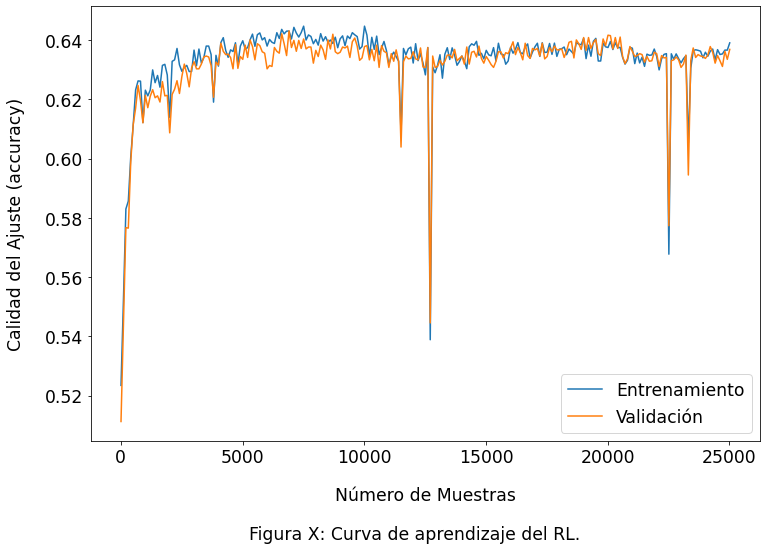

In [ ]:
#Plotear Curva de aprendizaje
fig, axe = plt.subplots(1,1)
fig.set_facecolor("w")
fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*2)
fig.suptitle('Figura X: Curva de aprendizaje del RL.', fontsize = "xx-large", y=-0.02)

axe.tick_params(labelsize = "xx-large")
axe.set_xlabel("Número de Muestras", labelpad=20.0, fontsize = "xx-large")
axe.set_ylabel("Calidad del Ajuste (accuracy)", labelpad=20.0, fontsize = "xx-large")
axe.plot(train_sizes, train_scores, label='Entrenamiento')
axe.plot(train_sizes, val_scores, label='Validación')

plt.legend(fontsize='xx-large')
plt.show()

# 5.Random Forest

El segundo modelo implementado fue un RandomForest. Este tipo clasificador fue elegido por ser uno de los modelos de referencia en el ámbito de la predicción, tanto en regresión como en clasificación (problema que nos atañe).

Se trata de un modelo formado por distintos árboles de decisión, cada uno entrenado con una muestra aleatoria ligeramente distinta de los datos de entrenamiento (bootstrap). La predicción de un modelo RF es el agregado de las predicciones sugeridas por cada uno de los árboles que lo conforman (aggregation).


## 5.1 Estimación de Hiperparámetros

La mayoría de hiperparámetros que el modelo utiliza no fueron discutidos con demasiada profundidad durante el curso con lo que salvo el número de árboles, se utilizaron los valores por defecto que la biblioteca ScikitLearn propone (extensamente probados por sus desarrolladores).

Número de árboles: Un nombre bastante auto-descriptivo. Cuanto mayor sea, mejor. Un exceso de árboles no provoca overfitting, pero a partir de un umbral crítico el rendimiento apenas mejora, mientras que el coste computacional sigue aumentando. Para determinar el valor óptimo de éste hiperparámetro, en lugar de recurrirse a la validación cruzada, como en el resto de modelos, se comprobó el valor del OOB-Error para un número creciente de árboles: de 1 a 200, de 5 en 5 (1, 6, 11, 16 …) y de 200 a 450, de 50 en 50 (200, 250, 300 …).

La utilización del OOB-Error como técnica de validación, es propia de modelos que utilizan “bagging” (“bootstrap agregation”). En el caso concreto de los clasificadores RF, cada uno de los árboles que componen el modelo ajusta/entrena con un subconjunto de observaciones aleatorio distinto, luego éste puede utilizarse (sin temor al “data snooping”) para estimar el la etiqueta del conjunto de observaciones que no ha utilizado (observaciones Out-Of-Bag); en otras palabras, un árbol puede utilizarse para validar lo aprendido sobre aquellas observaciones que no utiliza. De esta manera puede comprobarse la validez del ajuste y del valor de los hiperparámetros sin necesidad de recurrir a otras técnicas como la validación cruzada [11]. El OOB-Error que devuelve la implementación del modelo utilizado (RandomForestClassifier de ScikitLearn) coincide con la accuracy (número de predicciones correctas).

## 5.2 Resultados Experimentales

### 5.2.1 Número de Árboles

Como ya se adelantó, puede observarse en la siguiente figura que cuanto mayor sea el número de árboles mejor es el rendimiento del modelo (estimado a través del OOB-error). Sin embargo, la mejora de accuracy empieza a frenar en torno a los 30 árboles, estancándose en un OOB-Error de 0.66 a partir de los 165 árboles, mientras que el tiempo de ejecución se dispara. Se escogió como valor óptimo del número de árboles, una cantidad (200 árboles) con OOB-Error cercano al mejor (accuracy = 0.6636) que conserva un tiempo de ejecución razonable (33.16 s).

In [ ]:
# Estimación del número de árboles a través del método de validación OOB-Error
from sklearn.ensemble import RandomForestClassifier
import time

time_scores = []
oob_scores   = []

# Valores posibles del nº de árboles
rango_val_n_arb = np.concatenate((np.array([1]), np.arange(5, 200, 5)))
rango_val_n_arb = np.concatenate((rango_val_n_arb, np.arange(200, 500, 50)))

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# Out-of-Bag y su tiempo de entrenamiento.
for i, n_arboles in enumerate(rango_val_n_arb):
  # Modelo
  modelo = RandomForestClassifier(
      n_estimators=n_arboles,
      criterion='gini',
      max_depth=None,
      min_samples_split=2,
      min_samples_leaf=1,
      min_weight_fraction_leaf=0.0,
      max_features='sqrt',
      max_leaf_nodes=None,
      min_impurity_decrease=0.0,
      bootstrap=True,
      oob_score=True,
      n_jobs=None,
      random_state=1234,
      verbose=0,
      warm_start=False,
      class_weight=None,
      ccp_alpha=0.0,
      max_samples=None
  )
  # Pipeline
  pipe_rf = Pipeline([('preprocessing', preprocessor),('RF', modelo)])
  #Entrenamiento
  t0 = time.time()
  _ = pipe_rf.fit(X_train, y_train)
  t1 = time.time()
  # Almacenamiento de resultados
  oob_scores.append(modelo.oob_score_)
  time_scores.append(t1-t0)
  print("Comprobado el valor: {}".format(rango_val_n_arb[i]))


In [ ]:
# Plotear evolución de OOB-error y del tiempo del ajuste con el número de árboles
fig, axes = plt.subplots(1,2)
fig.set_facecolor("w")
fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*4)
fig.suptitle('Figura X: OOB-Error (accuracy) y el tiempo de ejecución respecto al número de árboles del modelo.', fontsize = "xx-large", y=-0.02)

# Evolución de OOB-error con el número de árboles
axes[0].tick_params(labelsize = "xx-large")
axes[0].set_xlabel("Número de Árboles", labelpad=20.0, fontsize = "xx-large")
axes[0].set_ylabel("OOB-Error (accuracy)", labelpad=20.0, fontsize = "xx-large")
axes[0].plot(rango_val_n_arb, oob_scores, c='r')

# Evolución del tiempo de ajuste con el número de árboles
axes[1].tick_params(labelsize = "xx-large")
axes[1].set_xlabel("Número de Árboles", labelpad=20.0, fontsize = "xx-large")
axes[1].set_ylabel("Tiempo Ejecución [s]", labelpad=20.0, fontsize = "xx-large")
axes[1].plot(rango_val_n_arb, time_scores, c='b')

plt.show()

Tabla para comprobar la terna o correspondencia: (OOB-Error - Tiempo de Ejecución - Nº de Árboles)

In [ ]:
# Tabla para consultar las ternas: (OOB-ERror, Tiempo, Nº Árboels)
pd.DataFrame({'OOB-Error':oob_scores, 'Tiempo':time_scores, 'Nº Arboles':rango_val_n_arb}).head(5)

### 5.2.2 Prestaciones del Modelo

Para poder comparar las prestaciones de este modelo respecto al resto, se sometió al mismo proceso de validación cruzada (5 particiones) sobre el conjunto de entrenamiento, con el valor óptimo encontrado para el número de árboles (= 200).

In [ ]:
# Modelo con el número de árboles óptimo
modelo = RandomForestClassifier(
      n_estimators=200,
      criterion='gini',
      max_depth=None,
      min_samples_split=2,
      min_samples_leaf=1,
      min_weight_fraction_leaf=0.0,
      max_features='sqrt',
      max_leaf_nodes=None,
      min_impurity_decrease=0.0,
      bootstrap=True,
      oob_score=True,
      n_jobs=None,
      random_state=1234,
      verbose=0,
      warm_start=False,
      class_weight=None,
      ccp_alpha=0.0,
      max_samples=None
  )

# Pipeline
pipe_rf = Pipeline([('preprocessing', preprocessor),('RF', modelo)])

# Evaluación del modelo
from sklearn.model_selection import cross_validate
cv_scores = cross_validate(
                estimator = pipe_rf,
                X         = X_train,
                y         = y_train,
                scoring = ('precision','recall','f1','accuracy'),
                cv        = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1234),
                verbose = 2
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  33.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.8s remaining:    0.0s


[CV] END .................................................... total time=  27.9s
[CV] END .................................................... total time=  25.5s
[CV] END .................................................... total time=  25.1s
[CV] END .................................................... total time=  27.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min finished


In [ ]:
print('Prestaciones globales del modelo (validación cruzada sobre el conjunto de entrenamiento, 5 particiones).')
print('Precision: {}'.format(np.round(cv_scores['test_precision'].mean(), 4)))
print('Recall: {}'.format(np.round(cv_scores['test_recall'].mean(), 4)))
print('F1: {}'.format(np.round(cv_scores['test_f1'].mean(), 4)))
print('Accuracy: {}'.format(np.round(cv_scores['test_accuracy'].mean(), 4)))
print('Tiempo: {}'.format(np.round(cv_scores['fit_time'].mean(), 4)))

Prestaciones globales del modelo (validación cruzada sobre el conjunto de entrenamiento, 5 particiones).
Precision: 0.6746
Recall: 0.727
F1: 0.6998
Accuracy: 0.6684
Tiempo: 27.4763


### 5.2.3 Curva de Aprendizaje

Nuevamente, a fin de comprobar que el modelo está aprendiendo, se generó la curva de aprendizaje para una de las particiones anteriores.

In [ ]:
# Curva de apredizaje del proceso anterior (priemra de las particiones)
from sklearn.metrics import accuracy_score

# Genero particiones
cv= StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1234)

primera = True
c = X_train.columns

train_scores = []
val_scores = []

for train_index, val_index in cv.split(X_train, y_train):
  # Para la primera partición (redundante hacerlo para el resto)
  if(primera):
    train_sizes = np.arange(20, len(train_index), 100)
    # Almacenamos el errro conforme aumenta el tamaño de los datos con los que se entrena
    for size in train_sizes:
      # Error de entrenamiento
      X_train_split = pd.DataFrame(columns = c, data = X_train.to_numpy()[train_index])
      y_train_split = y_train.to_numpy()[train_index]
      X_train_split_size = pd.DataFrame(columns = c, data = X_train.to_numpy()[train_index[0:size]])
      y_train_split_size = y_train.to_numpy()[train_index[0:size]]
      pipe_rf.fit(X_train_split_size, y_train_split_size)
      y_train_split_pred = pipe_rf.predict(X_train_split)
      train_scores.append(accuracy_score(y_train_split, y_train_split_pred))
      # Error de validación
      X_val_split = pd.DataFrame(columns = c, data = X_train.to_numpy()[val_index])
      y_val_split = y_train.to_numpy()[val_index]
      y_val_split_pred = pipe_rf.predict(X_val_split)
      val_scores.append(accuracy_score(y_val_split, y_val_split_pred))
      print("{} de {}".format(size, len(train_index)))
    primera = False

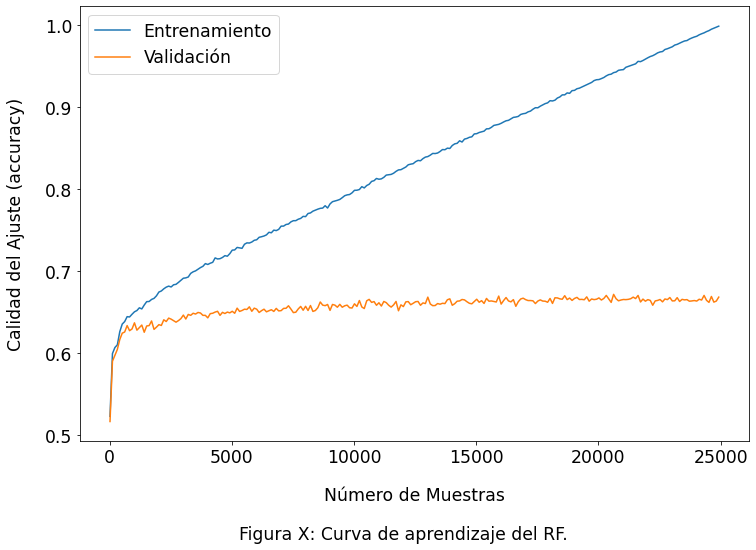

In [ ]:
#Plotear Curva de aprendizaje
fig, axe = plt.subplots(1,1)
fig.set_facecolor("w")
fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*2)
fig.suptitle('Figura X: Curva de aprendizaje del RF.', fontsize = "xx-large", y=-0.02)

axe.tick_params(labelsize = "xx-large")
axe.set_xlabel("Número de Muestras", labelpad=20.0, fontsize = "xx-large")
axe.set_ylabel("Calidad del Ajuste (accuracy)", labelpad=20.0, fontsize = "xx-large")
axe.plot(train_sizes, train_scores, label='Entrenamiento')
axe.plot(train_sizes, val_scores, label='Validación')
plt.legend(fontsize='xx-large')
plt.show()

Como puede observarse, las prestaciones del modelo (accuracy) para el conjunto de entrenamiento y de validación crecen con la proporción de datos utilizados (del conjunto de entrenamiento) durante el entrenamiento. Efectivamente, el modelo está aprendiendo.

# 6.Conclusiones

Ambos algoritmos implementados, tanto el lineal como el no lineal ofrecen un mejor resultado (respecto a la variable de referencia, ‘accuracy’) que los “dummies”. Incluso el resto de métricas de error también presenta un mejor valor (a excepción del “recall” para el siempre positivo, como era de prever). Si bien no ofrecen unos resultados extraordinariamente buenos, son mejores que el de un clasificador aleatorio: 26.11% mejor accuracy en el caso de RF y 20.32% mejor accuracy en el caso de RL.

Modelo | Precision | Recall | F1 | Accuracy | Tiempo
-|-|-|-|-|-|
RF | 0.6746 | 0.7270 | 0.6998 | 0.6684 | 28.6103
RL | 0.6378 | 0.7374 | 0.6839 | 0.6377 | 1.7554
Aleatorio | 0.53 | 0.49 | 0.51 | 0.49  | -
Siempre +1 | 0.53 | 1.00 | 0.69 | 0.53  | -
Siempre -1 | 0.00 | 0.00 | 0.00 | 0.47  | -

El modelo predictivo con mejor valor para la métrica de referencia (accuracy) sería el que se ofrecería a la empresa Marshable: Random Forest. A fin de proporcionar una estimación de cómo se comportaría en un contexto real, se utilizó el conjunto de test.

In [ ]:
# Mejor modelo encontrado
mejor_modelo = RandomForestClassifier(
      n_estimators=200,
      criterion='gini',
      max_depth=None,
      min_samples_split=2,
      min_samples_leaf=1,
      min_weight_fraction_leaf=0.0,
      max_features='sqrt',
      max_leaf_nodes=None,
      min_impurity_decrease=0.0,
      bootstrap=True,
      oob_score=True,
      n_jobs=None,
      random_state=1234,
      verbose=0,
      warm_start=False,
      class_weight=None,
      ccp_alpha=0.0,
      max_samples=None
  )

# Pipeline
pipe_mm = Pipeline([('preprocessing', preprocessor),('RF', mejor_modelo)])

# Entrenamiento
t0 = time.time()
pipe_mm.fit(X_train, y_train)
t1 = time.time()
t_total = t1-t0
# Test
y_pred_test = pipe_mm.predict(X_test)

In [ ]:
# Tabla de resultados
umbral = 1400
y_test[y_test < umbral] = -1 # Artículos impopulares
y_test[y_test >= umbral ] = 1 # Artículos populares

tabla = pd.DataFrame(columns = ['precision' , 'recall', 'f1', 'accuracy', 'tiempo'])
p = precision_score(y_test, y_pred_test, zero_division=0)
r = recall_score(y_test, y_pred_test, zero_division=0)
f1 = f1_score(y_test, y_pred_test, zero_division=0)
a = accuracy_score(y_test, y_pred_test)
tabla=tabla.append({'precision':p , 'recall':r, 'f1':f1, 'accuracy':a, 'tiempo':t_total}, ignore_index=True)
print('Prestaciones para el conjunto de test: ')
tabla

Prestaciones para el conjunto de test: 


,precision,recall,f1,accuracy,tiempo
0,0.686399,0.722473,0.703974,0.673148,48.450371


# 7.Referencias

[1] K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence,September, Coimbra, Portugal.

[2] https://mashable.com

[3] David M Blei, Andrew Y Ng, and Michael I Jordan. Latent dirichlet allocation. Journal of Machine Learning Research, 3:993–1022, 2003.

[4] Tom De Smedt, Lucas Nijs, and Walter Daelemans. Creative web services with pattern. In Proceedings of the Fifth International Conference on Computational Creativity, 2014.

[5] http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

[6] https://scikit-learn.org/

[7] https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

[8] Tom Fawcett. An introduction to roc analysis. Pattern recognition letters, 27(8):861–874, 2006.

[9] https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

[10] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgdclassi#sklearn.linear_model.SGDClassifier

[11] https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710